# Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from scipy import stats 
import statsmodels.api as sm
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Dataset into Pandas Dataframe

In [2]:
#Reading data into pandas df
df = pd.read_csv("https://raw.githubusercontent.com/chiraggarg95/DS-203-Assignments/Assignment_4/summer-products-with-rating-and-performance_2020-08.csv")

# Display part of Dataset

In [3]:
#Displaying part of datasetṣ
df.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


#Cleaning up of Dataset

### Note: This is being done on the basis of analysis performed earlier

## Removing certain columns as they aren't useful in the analysis

#### However, this could also be done by storing the data in a completely new dataframe so as to not loose any important data, however this not done here as we anyways have the data available with us

In [4]:
df = df.drop(columns=["merchant_profile_picture", "product_url", "product_picture", "product_id","urgency_text", "merchant_id", "title", "title_orig", "merchant_title", "merchant_name", "tags", "merchant_info_subtitle"])

In [5]:
df.shape

(1573, 31)

### Removing those variables which have only 1 unique value

In [6]:
for var in df.columns:
  if df[var].nunique() == 1:
    df = df.drop(var,axis=1)

df.shape

(1573, 27)

## Replacing NaN values in rating count to 0.0

In [7]:
 # replacing null values by 0
df['rating_five_count'] = df['rating_five_count'].fillna(0)
df['rating_four_count'] = df['rating_four_count'].fillna(0)
df['rating_three_count'] = df['rating_three_count'].fillna(0)
df['rating_two_count'] = df['rating_two_count'].fillna(0)
df['rating_one_count'] = df['rating_one_count'].fillna(0)

Converting "units_sold" from float to int

In [8]:
df["units_sold"] = df["units_sold"].astype(int)

Cleaning up the data in "product_variation_size_id"

In [9]:
df["product_variation_size_id"] = df["product_variation_size_id"].replace(["S.","s","Size S.","Size S","SIZE S","S..","S/M(child)","Size/S","size S","Size--S","S Pink","S Diameter 30cm","pants-S","Suit-S","S(bust 88cm)","US-S","S (waist58-62cm)",""],"S")
df["product_variation_size_id"] = df["product_variation_size_id"].replace(["Size-L","L.","32/L","SizeL"],"L")
df["product_variation_size_id"] = df["product_variation_size_id"].replace(["Size-XS","XS.",""],"XS")
df["product_variation_size_id"] = df["product_variation_size_id"].replace(["M.","Size M","daughter 24M",""],"M")

# Graphical Analysis

In [10]:
(df.columns)

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badges_count', 'badge_local_product', 'badge_product_quality',
       'badge_fast_shipping', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'origin_country', 'merchant_rating_count',
       'merchant_rating', 'merchant_has_profile_picture'],
      dtype='object')

## Pie chart for number of Units sold  for top 6 product sizes sold

In [11]:
df_size_units = df.groupby(["product_variation_size_id"]).sum()["units_sold"].sort_values(ascending=False)[0:6].reset_index()

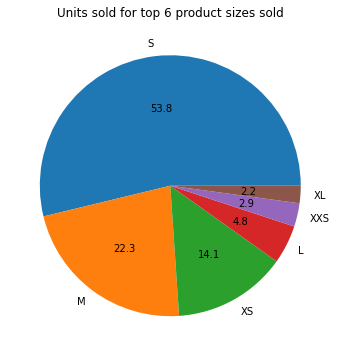

In [12]:
plt.figure(figsize=(10, 6))
plt.pie([x for x in df_size_units["units_sold"]],labels=[x for x in df_size_units["product_variation_size_id"]] , autopct='%0.1f')
plt.title("Units sold for top 6 product sizes sold")
plt.show()

## Line plot for rating of product versus its price

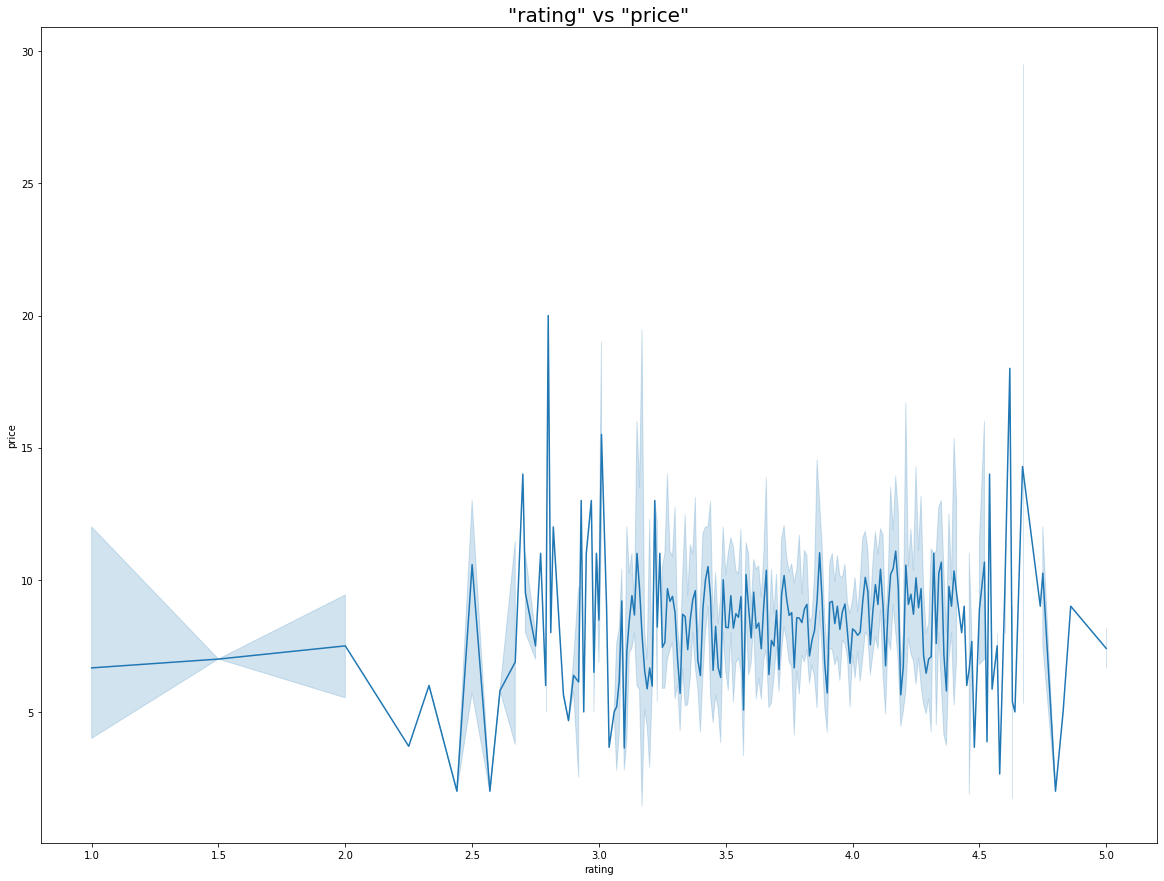

In [13]:
plt.figure(figsize = (20,15))
plt.title('"rating" vs "price"', fontsize=20)
sns.lineplot(x="rating", y="price", data = df)

## Bar plot for product color versus the number of countries it is shipped to.

#### This gives an idea of the color demanded in exports

In [14]:
df_color_exp = df.groupby("product_color").sum()["countries_shipped_to"].sort_values(ascending=False)[0:10].reset_index()[["product_color", "countries_shipped_to"]]

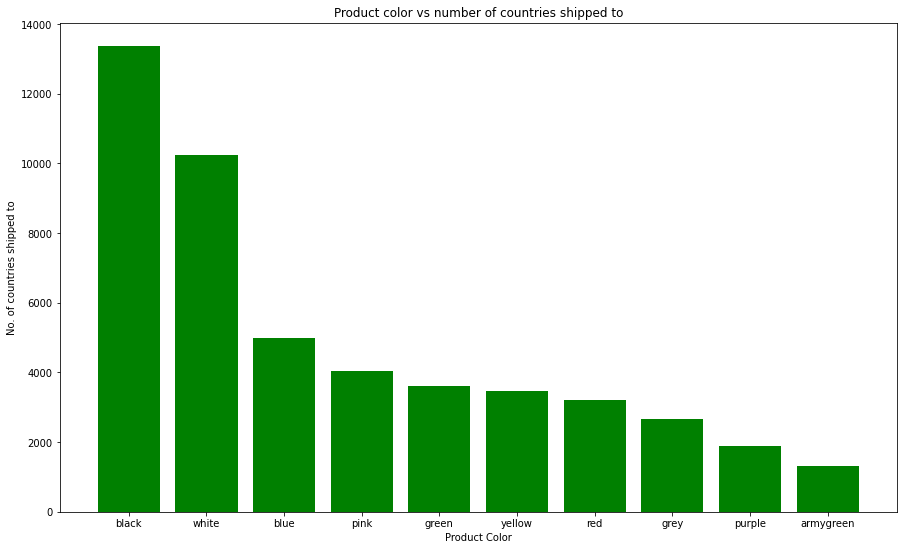

In [15]:
plt.figure(figsize=(15, 9))
plt.bar(df_color_exp["product_color"], df_color_exp["countries_shipped_to"], color="green")
plt.xlabel('Product Color')
plt.ylabel('No. of countries shipped to')
plt.title("Product color vs number of countries shipped to")
plt.show()

## Line plot for no of countries the product is shipped to versus its price

#### It indicates the variation in price as the exports change 


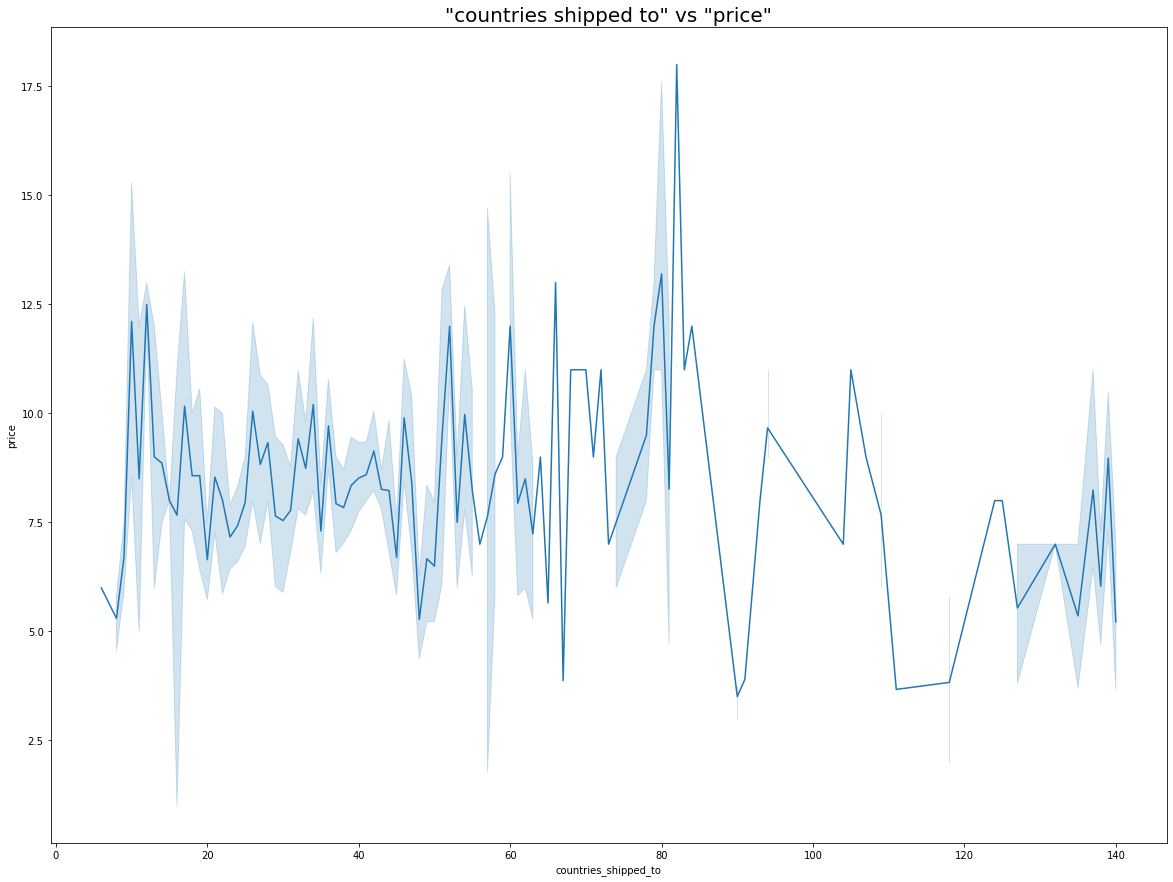

In [16]:
plt.figure(figsize = (20,15))
plt.title('"countries shipped to" vs "price"', fontsize=20)
sns.lineplot(x="countries_shipped_to", y="price", data = df)

## Line Plot (with uses_ad_boost as hue) of retail_price vs price 

#### This indicates the variation of retail price with price of product in two cases of uses_ad_boost

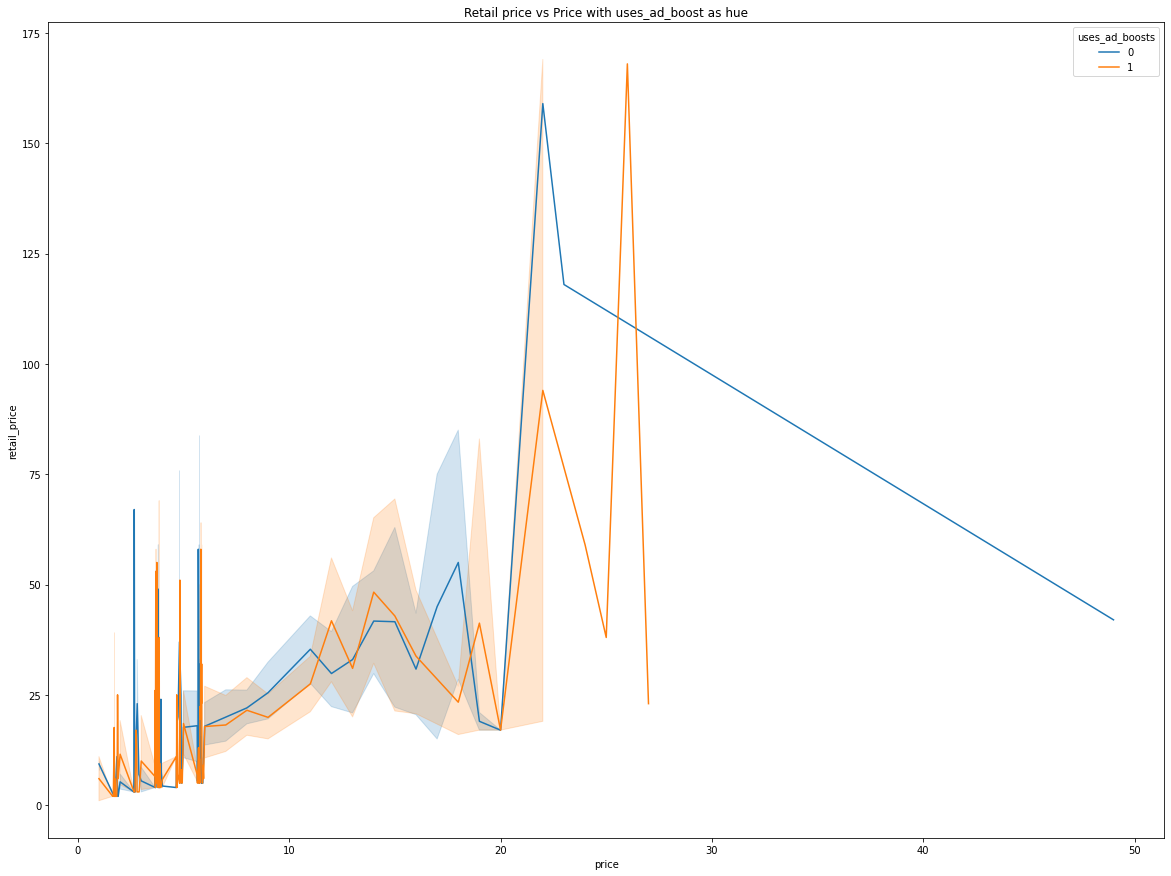

In [17]:
plt.figure(figsize = (20,15))
sns.lineplot(x = "price", y = "retail_price", data = df, hue = "uses_ad_boosts")
plt.title("Retail price vs Price with uses_ad_boost as hue")
plt.show()

## Bubble plot for merchant rating rating vs price of product

#### This indicates how the 3 variables are related to each other

In [18]:
df_1 = df.groupby("rating").mean().reset_index()

fig = px.scatter(df_1, x="merchant_rating", y="price", size="rating", color="rating", size_max=20)
fig.show()